#Sentiment Analysis using DistilBERT

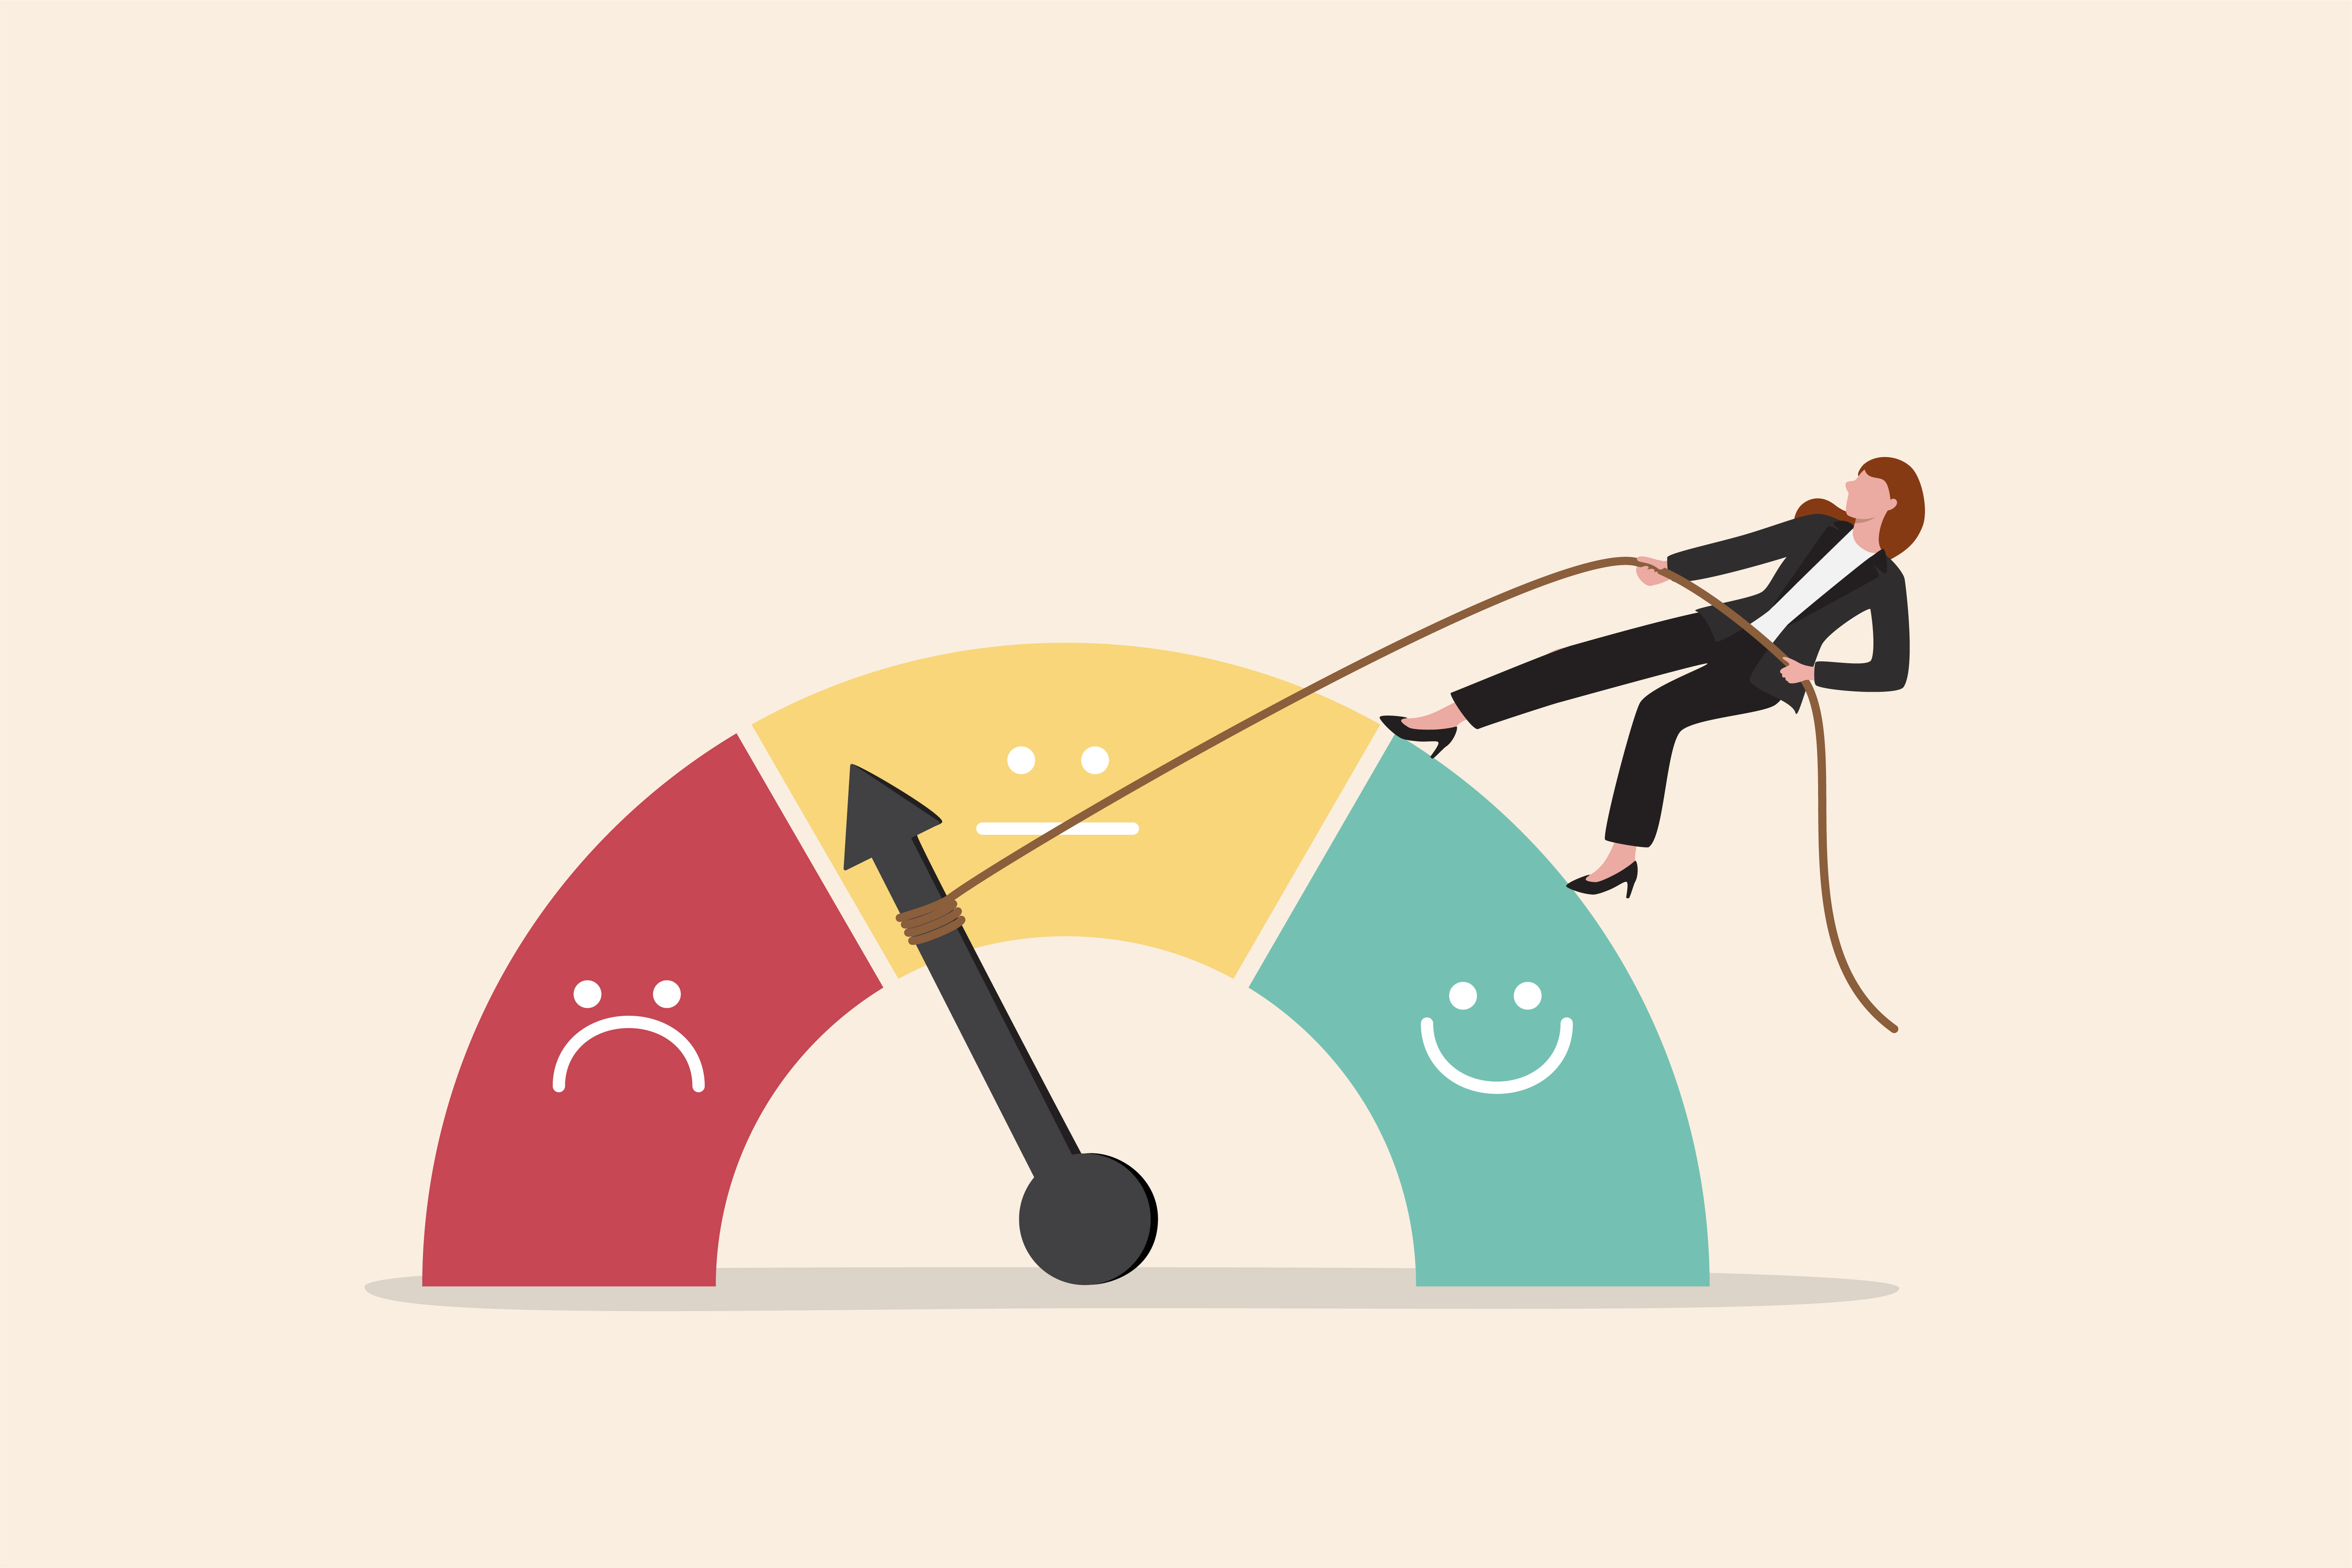

To import the DistilBERT model in Python, you can use the Hugging Face transformers library, which provides a convenient interface to work with various pre-trained transformer models, including DistilBERT. First, you need to install the library:

For this, we'll use the pipeline module from the transformers library, which provides a convenient way to perform various NLP tasks, including sentiment analysis:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install wordcloud matplotlib
%matplotlib inline

In [2]:
# Load CSV file into a DataFrame without header
df = pd.read_csv("/content/ch4_feedback_data.csv", header=None)

In [3]:
df.head()

,0,1
0,Your products are excellent. I really love the...,delivery to my location in Los Angeles was a ...
1,The customer service team in New York was help...,NaN
2,The new features in the latest release are fan...,NaN
3,The product didn't meet my expectations,and I'm disappointed. I hope you can address ...
4,Your products are not good. I really don't lik...,delivery to my location in Los Angeles was a ...


#Exercise #1: Load Pre-Trained DistilBERT model and Tokenizer

In [7]:
from transformers import pipeline, DistilBertModel, DistilBertTokenizer

# Load pre-trained DistilBERT model and tokenizer
model = DistilBertModel.from_pretrained('distilbert-base-uncased')
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

#Exercise #2: Load DistilBERT Sentiment Analysis Pipeline

In [8]:
# EXERCISE - COMPLETE THE CODE


# Load DistilBERT sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")



# Iterate over the rows and perform sentiment analysis with DistilBERT
results = []
for index, row in df.iterrows():
    text = row[0]
    result = sentiment_pipeline(text)[0]
    results.append({"text":text, "label":result['label'],"score":result['score']})


# Iterate over the sentiment results and print each entry


# Convert DistilBERT sentiment results to DataFrame
sentiment_df_bert = pd.DataFrame(results)

# Save DistilBERT sentiment results to a new CSV file
sentiment_df_bert.to_csv("sentiment_results_bert.csv", index=False)


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

#Exercise #3 (Optional): Exploratory Data Analysis

In [9]:
sentiment_df_bert.head()

,text,label,score
0,Your products are excellent. I really love the...,5 stars,0.574427
1,The customer service team in New York was help...,4 stars,0.554317
2,The new features in the latest release are fan...,5 stars,0.835702
3,The product didn't meet my expectations,2 stars,0.478028
4,Your products are not good. I really don't lik...,2 stars,0.513806


Word Cloud

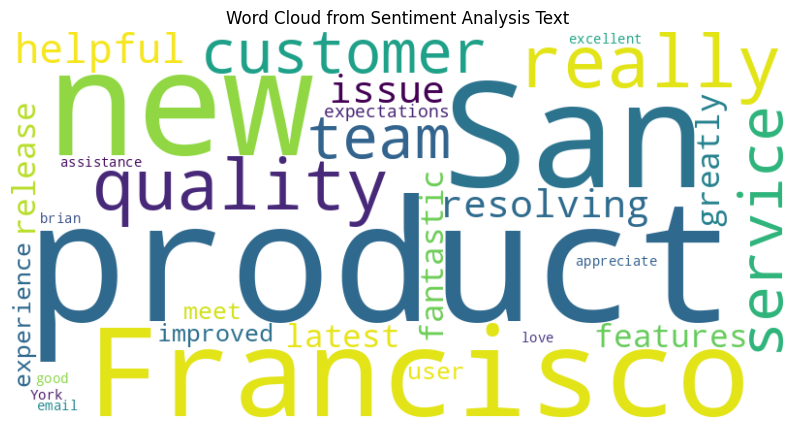

In [11]:
from wordcloud import WordCloud


# Assuming you have already performed sentiment analysis and have sentiment_df_bert DataFrame

# Combine all text data into a single string for word cloud generation
text_combined = ' '.join(sentiment_df_bert['text'])

# Create a WordCloud object with specific settings (e.g., background color, colormap)
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_combined)

# Plot the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axes for better visualization
plt.title('Word Cloud from Sentiment Analysis Text')
plt.show()


Pie Chart

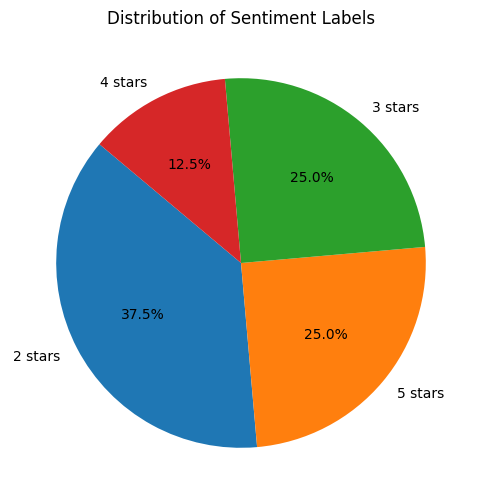

In [13]:
# Count the occurrences of each sentiment label
sentiment_label_counts = sentiment_df_bert['label'].value_counts()

# Plotting pie chart for sentiment labels
plt.figure(figsize=(8, 6))
plt.pie(sentiment_label_counts, labels=sentiment_label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sentiment Labels')
plt.show()



Bar Chart

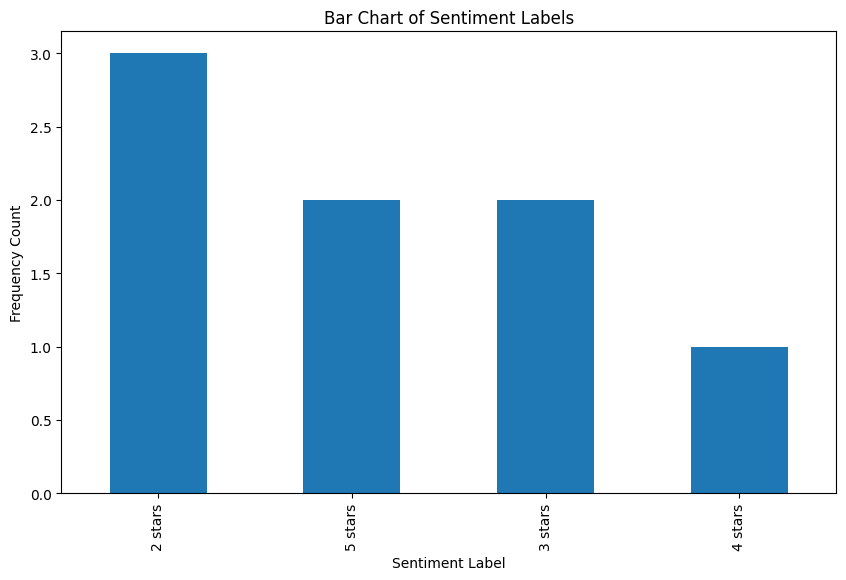

In [14]:
# Count the occurrences of each sentiment label for visualization
sentiment_label_counts = sentiment_df_bert['label'].value_counts()

# Plotting stacked bar chart for sentiment labels
plt.figure(figsize=(10, 6))
sentiment_label_counts.plot(kind='bar', stacked=True)
plt.title('Bar Chart of Sentiment Labels')
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency Count')
plt.show()
